In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
movie_path='/content/drive/MyDrive/RecSys/movie.csv'
rating_path='/content/drive/MyDrive/RecSys/rating.csv'


In [ ]:
movie_1=pd.DataFrame(pd.read_csv(movie_path,usecols=[0,1,2]))
rating_1=pd.DataFrame(pd.read_csv(rating_path,usecols=[0,1,2]))

In [ ]:
merged_data_1=rating_1.merge(movie_1,on='movieId')

In [ ]:
merged_data_1.head()

,userId,movieId,rating,title,genres
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,Jumanji (1995),Adventure|Children|Fantasy


In [ ]:
merged_data_1.shape

(20000263, 5)

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(merged_data_1.isnull().sum())


Missing Values:
userId     0
movieId    0
rating     0
title      0
genres     0
dtype: int64


In [ ]:
# # Relationship between 'rating' and 'title'
# plt.figure(figsize=(12, 6))
# plt.scatter(merged_data_1['rating'], merged_data_1['title'])
# plt.xlabel('Rating')
# plt.ylabel('Title')
# plt.title('Relationship between Rating and Title')
# plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35998 (\N{CJK UNIFIED IDEOGRAPH-8C9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


KeyboardInterrupt: 

In [ ]:
merged_data_1['genres'].value_counts()

Drama                                           1467402
Comedy                                          1316161
Comedy|Romance                                   793252
Comedy|Drama                                     656474
Drama|Romance                                    644626
                                                 ...   
Animation|Children|Comedy|Western                     1
Action|Animation|Children|Comedy|Fantasy              1
Action|Adventure|Comedy|Crime|Drama|Thriller          1
Adventure|Crime                                       1
Action|Adventure|Comedy|Fantasy|Sci-Fi                1
Name: genres, Length: 1329, dtype: int64

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming merged_data_1 is your DataFrame and 'genres' is the column containing genres
genres_text = ' '.join(merged_data_1['genres'].dropna())  # Combine all genres into a single string

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres_text)

# Display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


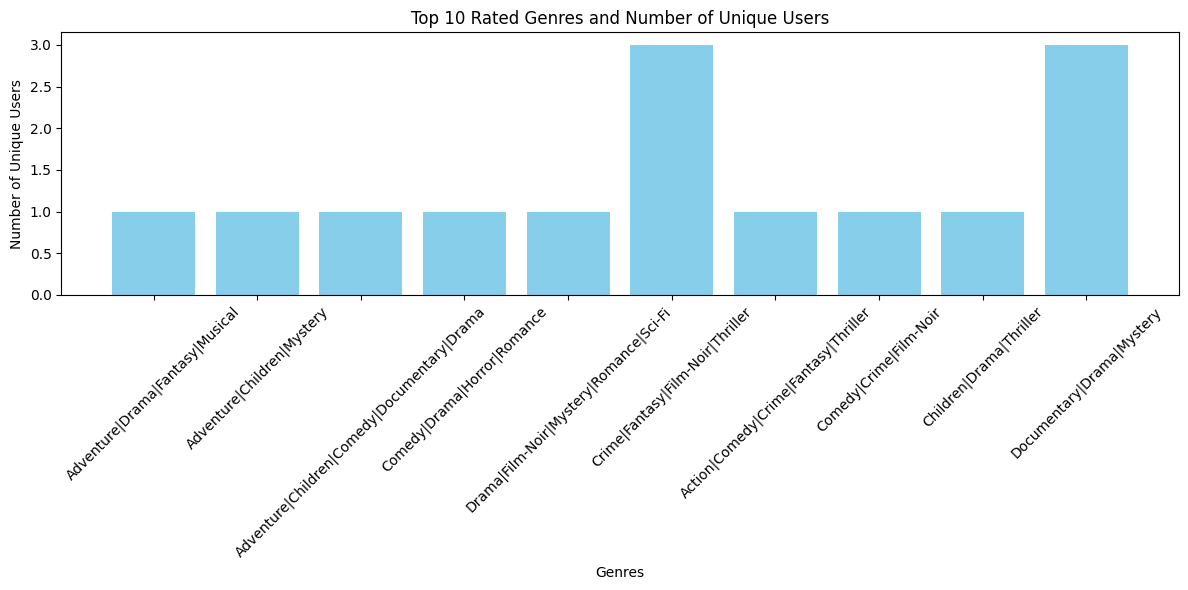

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by genre and calculate mean rating
genre_ratings = merged_data_1.groupby('genres')['rating'].mean().reset_index()

# Sort genres by mean rating in descending order and select top 10
top_rated_genres = genre_ratings.sort_values(by='rating', ascending=False).head(10)

# Get the unique users who rated each genre
num_users = []
for genre in top_rated_genres['genres']:
    unique_users = merged_data_1.loc[merged_data_1['genres'] == genre, 'userId'].nunique()
    num_users.append(unique_users)

# Add the number of unique users as a new column in top_rated_genres DataFrame
top_rated_genres['num_users'] = num_users

# Plot the top 10 rated genres with the number of unique users
plt.figure(figsize=(12, 6))
plt.bar(top_rated_genres['genres'], top_rated_genres['num_users'], color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Number of Unique Users')
plt.title('Top 10 Rated Genres and Number of Unique Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd


# Group by movie_Id and count the number of unique user Ids
movie_user_counts = merged_data_1.groupby('movieId')['userId'].nunique().reset_index()

# Rename columns for clarity
movie_user_counts.columns = ['movieId', 'num_unique_users']

# Display the number of unique users who rated each movie
print(movie_user_counts)


       movieId  num_unique_users
0            1             49695
1            2             22243
2            3             12735
3            4              2756
4            5             12161
...        ...               ...
26739   131254                 1
26740   131256                 1
26741   131258                 1
26742   131260                 1
26743   131262                 1

[26744 rows x 2 columns]


In [ ]:
# Assuming merged_data_1 is your DataFrame
average_rating = merged_data_1['rating'].mean()

# Display the average rating of all movies
print("Average rating of all movies:", average_rating)


Average rating of all movies: 3.5255285642993797


In [ ]:
import pandas as pd


# Group by movie_Id and calculate the mean rating
average_rating_per_movie = merged_data_1.groupby('movieId')['rating'].mean().reset_index()

# Display the average rating of each movie
print(average_rating_per_movie)


       movieId    rating
0            1  3.921240
1            2  3.211977
2            3  3.151040
3            4  2.861393
4            5  3.064592
...        ...       ...
26739   131254  4.000000
26740   131256  4.000000
26741   131258  2.500000
26742   131260  3.000000
26743   131262  4.000000

[26744 rows x 2 columns]


#ITEM ITEM COLLABORATIVE


In [ ]:
movie_path='/content/drive/MyDrive/RecSys/movie.csv'
rating_path='/content/drive/MyDrive/RecSys/rating.csv'

In [ ]:
movie=pd.DataFrame(pd.read_csv(movie_path,usecols=[0,1]))
rating=pd.DataFrame(pd.read_csv(rating_path,usecols=[0,1,2]))

In [ ]:
rating.columns

Index(['userId', 'movieId', 'rating'], dtype='object')

In [ ]:
movie.columns

Index(['movieId', 'title'], dtype='object')

In [ ]:
merged_data=rating.merge(movie,on='movieId')

In [ ]:
merged_data

,userId,movieId,rating,title
0,1,2.0,3.5,Jumanji (1995)
1,5,2.0,3.0,Jumanji (1995)
2,13,2.0,3.0,Jumanji (1995)
3,29,2.0,3.0,Jumanji (1995)
4,34,2.0,3.0,Jumanji (1995)
...,...,...,...,...
225277,1555,406.0,3.0,Federal Hill (1994)
225278,1557,138.0,3.0,"Neon Bible, The (1995)"
225279,1559,84312.0,3.0,Home Alone 4 (2002)
225280,1559,90620.0,5.0,Mulan (2009)


In [ ]:
merged_data=merged_data.dropna(axis=0,subset=['title'])
rating_count = merged_data.groupby('title')['rating'].count().re


In [ ]:
rating_count

title
'Hellboy': The Seeds of Creation (2004)       2
'Neath the Arizona Skies (1934)               1
'Round Midnight (1986)                        2
'Salem's Lot (2004)                           2
'Til There Was You (1997)                     8
                                             ..
eXistenZ (1999)                              60
xXx (2002)                                   50
xXx: State of the Union (2005)               10
¡Three Amigos! (1986)                        68
À nous la liberté (Freedom for Us) (1931)     2
Name: rating, Length: 10312, dtype: int64